# Data Wrangling: WeRateDogs Twitter Data

In [1]:
# import necessary libraries
import pandas as pd
import requests
import os
import json
import tweepy
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## 1.Gathering Data Process
### 1.1 Twitter archive (csv file)

In [2]:
#produce archive dataframe from twitter-archive-enhanced.csv
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

## 1.2 Image prediction file (tsv file)

In [3]:
# Downloading file from internet using requests library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):  
    with open (file_name , mode = 'wb')as file:
            file.write(response.content)

In [4]:
# Produce Image prediction dataframe using the downloaded file (tsv file)
Image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')


## 1.3 Twitter API Data 
Here, I used the second method as the response on my request for twitter
developer account does not reach yet 

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit= True,wait_on_rate_limit_notify= True, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [6]:
# Reading the tweet-json.txt file line by line to make the api dataframe from it
df_list = []

with open('tweet_json.txt','r')as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        full_text = tweet['full_text']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count':retweet_count,
                       'favorite_count':favorite_count,
                       'full_text':full_text})

In [7]:
api_df = pd.DataFrame(df_list)


## 2.Assessment Process
### 2.1  `archive_df ` table 

In [8]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,12,10,Rosie,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
688,787810552592695296,NaN,NaN,2016-10-17 00:20:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frank. He wears sunglasses and walks h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,None,None,None,None
689,787717603741622272,NaN,NaN,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,None,None,None,None


In [9]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
sum(archive_df['tweet_id'].duplicated())


0

### 2.2  `Image_prediction_df ` table 

In [11]:
Image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,Labrador_retriever,0.068718,True,kuvasz,0.030387,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True


In [12]:
Image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
Image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
sum(Image_prediction_df['tweet_id'].duplicated())


0

### 2.3  `api_df ` table 

In [15]:
api_df.head(5)

,favorite_count,full_text,retweet_count,tweet_id
0,35251,This is Phineas. He's a mystical boy. Only eve...,7434,892420643555336193
1,30515,This is Tilly. She's just checking pup on you....,5528,892177421306343426
2,22943,This is Archie. He is a rare Norwegian Pouncin...,3648,891815181378084864
3,38543,This is Darla. She commenced a snooze mid meal...,7612,891689557279858688
4,36815,This is Franklin. He would like you to stop ca...,8193,891327558926688256


In [16]:
api_df.columns

Index(['favorite_count', 'full_text', 'retweet_count', 'tweet_id'], dtype='object')

In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count    2331 non-null int64
full_text         2331 non-null object
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [18]:
api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2331.000000,2331.000000,2.331000e+03
mean,7364.209781,2611.159159,7.419079e+17
std,11436.484366,4417.871392,6.823170e+16
min,0.000000,1.000000,6.660209e+17
25%,1279.500000,528.500000,6.782670e+17
50%,3197.000000,1220.000000,7.182469e+17
75%,9013.500000,3032.000000,7.986692e+17
max,151835.000000,75039.000000,8.924206e+17


In [19]:
sum(api_df['tweet_id'].duplicated())

0

##  Assessment Sumary
###  Quailty Issues 

##### `archive_df ` table 
- values of tweet_id column are integers, but it should be object type
- values of timestamp column are integers, but it should be datetime type
- rating_denominator column has zero value as minimum, divison by zero !
- some columns have "NaN" as a missing values and the others have "None" which is an inconsistent issue. 
- columns (in_reply_to_status_id, retweeted_status_id) have replies and retweets which we do not need.
- columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) have large missing values, we will not use them in our analysis
- Missing values in expanded_urls columns.
- Inaccurate entries of (rating_numerator , rating_denominator) columns
- Inaccurate values of rating_numerator, it has a maximum value of 1776 !
- Inaccurate values of rating_denomintor, it has a maximum value of 170 !

##### `Image_prediction_df ` table 
- some values of predicted dog names columns (p1,p2,p3) capitalized and other are in lowercase.
- columns(p1,p2,p3) have non-descriptive names
- total number of entries is 2075 instead of 2356

###  Tidness Issues 

##### `archive_df ` table 
- the last four columns(doggo, floofer, pupper, puppo) should merged to only one column "dog_stage"
- timestamp column consists of two values(date, time) 

##### `api_df ` table 
- Each type of observational unit forms a table, which does not happen here, so it should be merged to archive_df table

## 3. Cleaning Process

In [7]:
# making a copy of each dataset to work on it
archive_clean = archive_df.copy()
image_prediction_clean = Image_prediction_df.copy()
api_clean = api_df.copy()

### Quality Issues

#### Define
- change the dtype of 'tweet_id' column in archive_df table from int to object
- change the dtype of 'timestamp' column in archive_df table from object to datetime

#### Code

In [8]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(object)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [140]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### Define
Delete the values which euqal zero in rating_denominator column in archive_df table to avoid division by zero

#### Code

In [9]:
# check the row in which rating_denominator equals to x
archive_clean[archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [10]:
# Delete this row in archive_clean tabel 
archive_clean.drop(archive_clean[archive_clean['rating_denominator'] == 0].index , inplace = True)

#### Test

In [23]:
archive_clean.rating_denominator[archive_clean.rating_denominator == 0].value_counts()

Series([], Name: rating_denominator, dtype: int64)

In [24]:
archive_clean.shape

(2355, 17)

#### Define
Change the inconsistent of having missing values as 'Nonne' in some columns and 'NaN' in others, so change 'None' in
(name , doggo , floofer , pupper . puppo) column to 'NaN'

#### Code

In [11]:
columns_list = ['name' , 'doggo' , 'floofer' , 'pupper' , 'puppo']
for column in columns_list:   
    archive_clean[column].replace('None', np.nan ,inplace = True)

#### Test

In [122]:
archive_clean.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
732,781524693396357120,NaN,NaN,2016-09-29 16:03:01,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781524693...,12,10,NaN,NaN,NaN,NaN,NaN
1285,708469915515297792,NaN,NaN,2016-03-12 01:49:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,NaN,NaN,NaN,NaN
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,NaN,NaN,NaN,NaN
173,858471635011153920,NaN,NaN,2017-04-30 00:02:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,NaN,NaN,NaN,NaN
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,NaN,NaN,NaN,pupper,NaN
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,NaN,NaN,NaN,NaN
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,NaN,NaN,NaN,NaN


#### Define
Remove records that have values in (in_reply_to_status_id, retweeted_status_id) columns which have replies and retweets,as we need original tweets only , no replies or retweets

#### Code 

In [12]:
archive_clean.drop(archive_clean[archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id.notnull()].index, inplace = True)

#### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(4),

#### Define
Drop unneeded columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) from the archive_clean table as they have large number of missing values

#### Code

In [13]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'
                                  , 'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis = 1 )

#### Test

In [146]:
print(archive_clean.shape)
archive_clean.info()

(2097, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Define 
Drop missing values in expanded_urls column, as thees missing values are for tweets without photos

#### Code

In [14]:
archive_clean.drop(archive_clean[archive_clean.expanded_urls.isnull()].index, inplace = True)

#### Test

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### Define 
change all values of predicted dog name columns (p1,p2,p3) to lowercase 

#### Code

In [15]:

image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()

#### Test

In [36]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,west_highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,dandie_dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
856,696754882863349760,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,1,weasel,0.137832,False,toy_poodle,0.098378,True,scottish_deerhound,0.097397,True


#### Define
Rname columns of image_prediction_clean table that have non-decriptive names

#### code 

In [16]:
image_prediction_clean= image_prediction_clean.rename(columns={'p1':'algorithm\'s #1 prediction',
                                                               'p2':'algorithm\'s #2 prediction',
                                                               'p3':'algorithm\'s #3 prediction'})

#### Test

In [38]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,algorithm's #1 prediction,p1_conf,p1_dog,algorithm's #2 prediction,p2_conf,p2_dog,algorithm's #3 prediction,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
change the type of 'tweet_id column from integer to object in api_clean table to match the same column in other dataframes

#### Code 

In [17]:
api_clean['tweet_id'] = api_clean['tweet_id'].astype(object)

#### Test

In [40]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
full_text         2354 non-null object
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


#### Define 
For dog ratings,Getting decimal ratings using regular expressions.

#### Code

In [18]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


#### Test
we should convert

In [19]:
print(archive_clean.text[45])
print(archive_clean.text[695])
print(archive_clean.text[763])
print(archive_clean.text[1712])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [21]:
archive_clean.rating_numerator[45]= 13
archive_clean.rating_numerator[695]= 9
archive_clean.rating_numerator[763]= 11.
archive_clean.rating_numerator[1712]= 11.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

In [23]:
print(archive_clean.rating_numerator[45])
print(archive_clean.rating_numerator[695])
print(archive_clean.rating_numerator[763])
print(archive_clean.rating_numerator[1712])

13
9
11
11


### Tidness Issues

#### Define
split timestamp column into time column and date column to ensure that each variable forms a column.

#### Code

In [17]:
archive_clean['date'] = [d.date() for d in archive_clean['timestamp']]
archive_clean['time'] = [d.time() for d in archive_clean['timestamp']]
#archive_clean = archive_clean.drop('timestamp' , axis = 1)

#### Test

In [158]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,NaN


In [43]:
archive_clean.date.sample(10)

254     2017-03-22
2045    2015-12-01
2131    2015-11-27
1302    2016-03-09
1917    2015-12-08
690     2016-10-15
2254    2015-11-20
875     2016-08-04
1424    2016-02-12
1128    2016-05-10
Name: date, dtype: object

In [44]:
archive_clean.time.sample(10)

2258    15:20:54
1428    03:02:54
378     17:34:40
901     01:31:38
347     17:02:36
1410    01:05:02
1483    02:41:58
417     17:00:46
1300    22:24:31
49      00:46:41
Name: time, dtype: object

#### Define
Combine the last four columns(doggo, floofer, pupper, puppo) of archive_clean table into only one column 'dog_stage'

#### Code

In [20]:
# handle none
archive_clean.doggo.replace(np.nan, '', inplace=True)
archive_clean.floofer.replace(np.nan, '', inplace=True)
archive_clean.pupper.replace(np.nan, '', inplace=True)
archive_clean.puppo.replace(np.nan, '', inplace=True)

# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [23]:
archive_clean.sample(5) 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
1117,732375214819057664,2016-05-17 01:00:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,,,,2016-05-17,01:00:32,doggo
944,752682090207055872,2016-07-12 01:52:49,"<a href=""http://twitter.com/download/iphone"" r...",Nothing better than a doggo and a sunset. 10/1...,https://twitter.com/dog_rates/status/752682090...,10,10,NaN,doggo,,,,2016-07-12,01:52:49,doggo
2013,672231046314901505,2015-12-03 01:49:05,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,https://twitter.com/dog_rates/status/672231046...,5,10,NaN,,,,,2015-12-03,01:49:05,NaN
578,800751577355128832,2016-11-21 17:23:47,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,,,,,2016-11-21,17:23:47,NaN
1297,707776935007539200,2016-03-10 03:55:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,,,,,2016-03-10,03:55:45,NaN


In [24]:
archive_clean.dog_stage[575]

'doggo, pupper'

In [159]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 196.3+ KB


In [25]:
#dropping unnecessary columns ['doggo' , 'floofer' , 'pupper' , 'puppo']
archive_clean = archive_clean.drop(['doggo' , 'floofer' , 'pupper' , 'puppo'] , axis = 1)

In [27]:
archive_clean.sample(5) 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
662,790987426131050500,2016-10-25 18:44:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,2016-10-25,18:44:32,NaN
758,778408200802557953,2016-09-21 01:39:11,"<a href=""http://twitter.com/download/iphone"" r...",RIP Loki. Thank you for the good times. You wi...,https://twitter.com/dog_rates/status/778408200...,14,10,NaN,2016-09-21,01:39:11,NaN
2206,668631377374486528,2015-11-23 03:25:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,2015-11-23,03:25:17,NaN
1056,742161199639494656,2016-06-13 01:06:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,2016-06-13,01:06:33,NaN
356,830583320585068544,2017-02-12 01:04:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilly. She just parallel barked. Kindl...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,2017-02-12,01:04:29,NaN


In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 276.3+ KB


#### Define
combine api_clean dataframe with archive_clean dataframe

#### Code

In [28]:
twitter_clean = pd.merge(archive_clean,api_clean, on ='tweet_id',how = 'inner')

#### Test

In [29]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 14 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
favorite_count        2094 non-null int64
full_text             2094 non-null object
retweet_count         2094 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 245.4+ KB


In [30]:
twitter_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorite_count,full_text,retweet_count
1334,687818504314159109,2016-01-15 02:08:05,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,https://twitter.com/dog_rates/status/687818504...,12,10,NaN,2016-01-15,02:08:05,pupper,2758,With great pupper comes great responsibility. ...,1080
716,756275833623502848,2016-07-21 23:53:04,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,NaN,2016-07-21,23:53:04,puppo,7114,When ur older siblings get to play in the deep...,1738
1566,676897532954456065,2015-12-15 22:52:02,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,https://twitter.com/dog_rates/status/676897532...,5,10,NaN,2015-12-15,22:52:02,NaN,2426,Exotic handheld dog here. Appears unathletic. ...,817
1961,668484198282485761,2015-11-22 17:40:27,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,https://twitter.com/dog_rates/status/668484198...,9,10,NaN,2015-11-22,17:40:27,NaN,453,Good teamwork between these dogs. One is on lo...,253
1436,682088079302213632,2015-12-30 06:37:25,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,https://vine.co/v/iqMjlxULzbn,12,10,NaN,2015-12-30,06:37:25,NaN,20108,I'm not sure what this dog is doing but it's p...,11271
1118,704847917308362754,2016-03-02 01:56:53,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hi could I get a number 4 with no pickles...",https://twitter.com/dog_rates/status/704847917...,12,10,NaN,2016-03-02,01:56:53,NaN,5594,"""Yes hi could I get a number 4 with no pickles...",1727
1643,674752233200820224,2015-12-10 00:47:23,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,https://twitter.com/dog_rates/status/674752233...,12,10,NaN,2015-12-10,00:47:23,NaN,1580,Everyone please just appreciate how perfect th...,516
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,2017-07-29,00:08:17,NaN,20562,Here we have a majestic great white breaching ...,3261
2070,666345417576210432,2015-11-16 20:01:42,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10,10,NaN,2015-11-16,20:01:42,NaN,307,Look at this jokester thinking seat belt laws ...,146
829,743545585370791937,2016-06-16 20:47:36,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bentley and Millie. They do every...,https://twitter.com/dog_rates/status/743545585...,11,10,Bentley,2016-06-16,20:47:36,NaN,3863,Say hello to Bentley and Millie. They do every...,1066


## 4. Storing Data

In [23]:
twitter_clean.to_csv('twitter_archive_master.csv', index=False)
image_prediction_clean.to_csv('Image_prediction_master.csv', index=False)

In [24]:
twitter_archive_master= pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 14 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
favorite_count        2094 non-null int64
full_text             2094 non-null object
retweet_count         2094 non-null int64
dtypes: int64(5), object(9)
memory usage: 229.1+ KB


In [25]:
Image_prediction_master = pd.read_csv('Image_prediction_master.csv' )
Image_prediction_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                     2075 non-null int64
jpg_url                      2075 non-null object
img_num                      2075 non-null int64
algorithm's #1 prediction    2075 non-null object
p1_conf                      2075 non-null float64
p1_dog                       2075 non-null bool
algorithm's #2 prediction    2075 non-null object
p2_conf                      2075 non-null float64
p2_dog                       2075 non-null bool
algorithm's #3 prediction    2075 non-null object
p3_conf                      2075 non-null float64
p3_dog                       2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 5. Insights and Visualizations
### 1. Five most Predicting dog type of the three algorithms
- plotting the most common dog type of each algorithm first
- combine all algorithms and plotting the most common dog type

In [55]:
Image_prediction_master['algorithm\'s #1 prediction'].value_counts()[0:5]

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
Name: algorithm's #1 prediction, dtype: int64

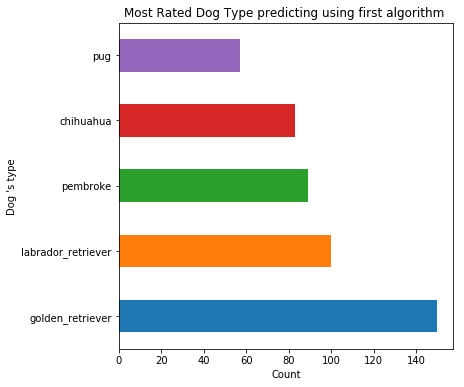

In [56]:
Image_prediction_master['algorithm\'s #1 prediction'].value_counts()[0:5].plot(kind = 'barh', figsize = (6,6))
plt.title('Most Rated Dog Type predicting using first algorithm ')
plt.xlabel('Count')
plt.ylabel('Dog \'s type')
plt.show()

In [57]:
Image_prediction_master['algorithm\'s #2 prediction'].value_counts()[0:5]

labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
Name: algorithm's #2 prediction, dtype: int64

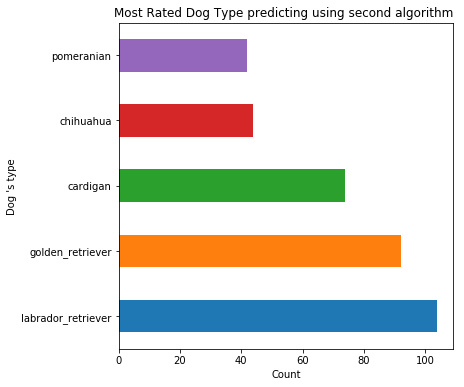

In [58]:
Image_prediction_master['algorithm\'s #2 prediction'].value_counts()[0:5].plot(kind = 'barh', figsize = (6,6))
plt.title('Most Rated Dog Type predicting using second algorithm ')
plt.xlabel('Count')
plt.ylabel('Dog \'s type')
plt.show()

In [59]:
Image_prediction_master['algorithm\'s #3 prediction'].value_counts()[0:5]

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
Name: algorithm's #3 prediction, dtype: int64

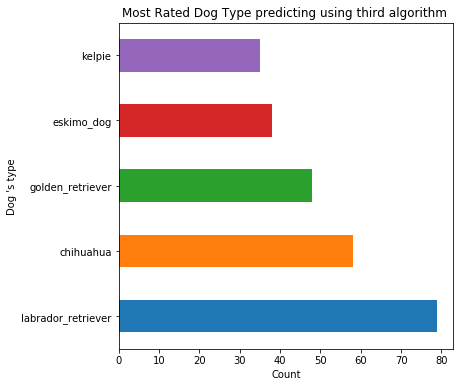

In [60]:
Image_prediction_master['algorithm\'s #3 prediction'].value_counts()[0:5].plot(kind = 'barh', figsize = (6,6))
plt.title('Most Rated Dog Type predicting using third algorithm ')
plt.xlabel('Count')
plt.ylabel('Dog \'s type')
plt.show()

In [61]:
# Most common dog type of overall three algorithms
overall_dog_types = pd.concat([Image_prediction_master['algorithm\'s #1 prediction'] ,
               Image_prediction_master['algorithm\'s #2 prediction'],
               Image_prediction_master['algorithm\'s #3 prediction']] , axis = 0 )

In [62]:
overall_dog_types.describe()

count                 6225
unique                 633
top       golden_retriever
freq                   290
dtype: object

In [63]:
overall_dog_types.value_counts()[0:7]

golden_retriever      290
labrador_retriever    283
chihuahua             185
pembroke              143
cardigan              116
pomeranian            109
toy_poodle            105
dtype: int64

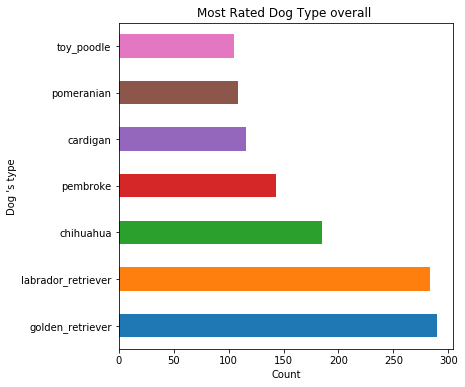

In [64]:
#overall_dog_type = overall_dog_type.groupby.filter(lambda x: len(x) > 100)
(overall_dog_types.value_counts()[0:7]).plot(kind = 'barh', figsize = (6,6))
plt.title('Most Rated Dog Type overall ')
plt.xlabel('Count')
plt.ylabel('Dog \'s type')
plt.show()

## 2. Most common dogs' names

In [65]:
top_names = twitter_archive_master.name.value_counts().nlargest(10)[1:7]
top_names

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Name: name, dtype: int64

Text(0,0.5,'count')

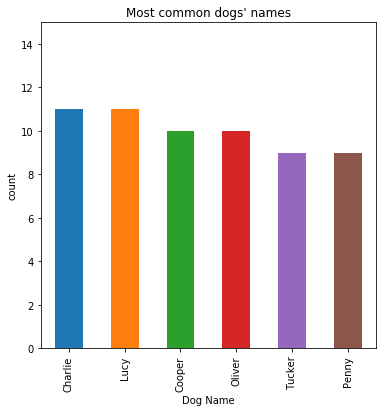

In [66]:
top_names.plot(kind= 'bar', figsize = (6,6))
axes = plt.gca()
axes.set_ylim([0,15])
plt.title("Most common dogs' names")
plt.xlabel('Dog Name')
plt.ylabel('count')

## 3. Most common dog's stage

In [67]:
twitter_archive_master.dog_stage.value_counts()

pupper     229
doggo       72
puppod      24
floofer     10
Name: dog_stage, dtype: int64

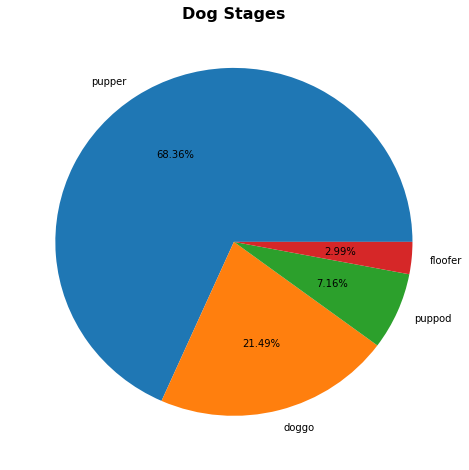

In [68]:
twitter_archive_master.dog_stage.value_counts().plot(kind= 'pie' , autopct='%.2f%%', figsize = (8,8))
plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=16);

## 4.Number of Tweets over Time

In [58]:
twitter_archive_master['year'] = pd.DatetimeIndex(twitter_archive_master['date']).year
twitter_archive_master['month'] = pd.DatetimeIndex(twitter_archive_master['date']).month
twitter_archive_master.month.sample(10)

1359     1
439     11
561      9
22       7
1786    12
862      6
1945    11
1044     3
1704    12
222      3
Name: month, dtype: int64

In [67]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 16 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
favorite_count        2094 non-null int64
full_text             2094 non-null object
retweet_count         2094 non-null int64
year                  2094 non-null int64
month                 2094 non-null int64
dtypes: int64(7), object(9)
memory usage: 261.8+ KB


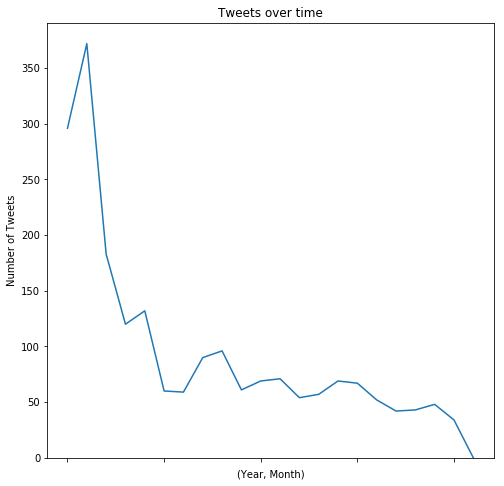

In [70]:
data = twitter_archive_master.tweet_id.groupby([twitter_archive_master["year"], twitter_archive_master["month"]]).count()
ax = data.plot('line', title='Tweets over time' ,figsize = (8,8))
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

## 5. Number of Retweets and likes (Favorites)  over time

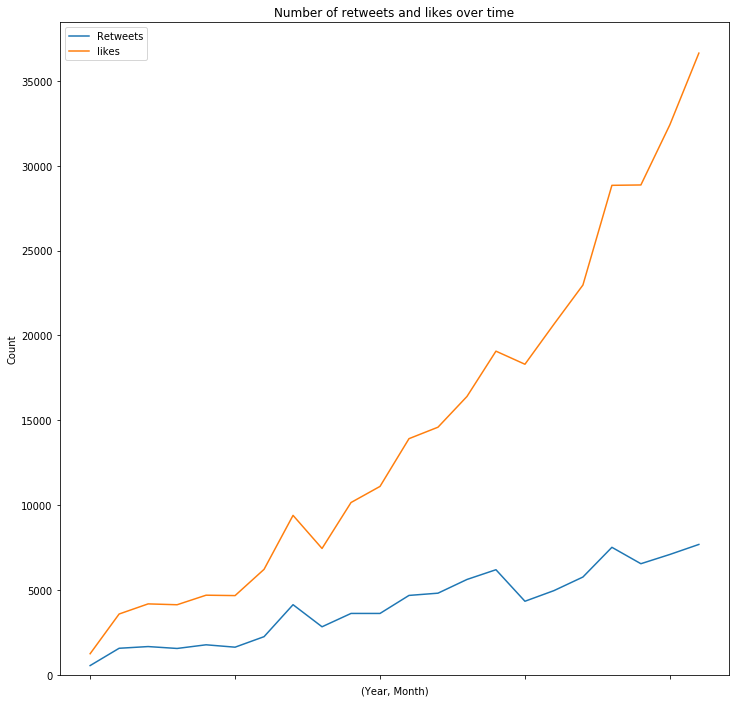

In [190]:

plt.subplots(1, sharex=True)
twitter_archive_master.retweet_count.groupby([twitter_archive_master["year"], twitter_archive_master["month"]]).mean().plot('line', figsize=(12,12))
twitter_archive_master.favorite_count.groupby([twitter_archive_master["year"], twitter_archive_master["month"]]).mean().plot('line').set_ylim(0, )
plt.title('Number of retweets and likes over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'likes'))


## 6. Relation between retweet_count and favorite_count

Text(0,0.5,'Favorites')

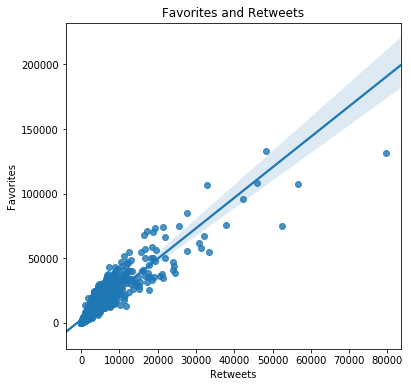

In [31]:
plt.figure(figsize=(6,6))
g = sns.regplot(twitter_archive_master.retweet_count ,twitter_archive_master.favorite_count)
#plt.scatter(twitter_archive_master.retweet_count ,twitter_archive_master.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')

there is positive correlation between retweet_count and favorite_count, as the number of retweets increases the number of likes increases